# SMARTS - A Language for Molecular Patterns

Substructure searching is the process of finding a particular pattern or subgraph in a molecular graph. Substructure search is  applied in depiction (to highlight a particular species / functional group), drug design (searching a database for structures and activity), analytical chemistry (SAR prediction), etc.

SMARTS is a language for specifying substructures using rules that are extensions of SMILES. For example, SMARTS string [OH]c1ccccc1 can be used to search a database for phenol-containing structures. All SMILES specifications are valid SMARTS targets. 

In SMARTS, atoms and bonds symbols specify the nodes and edges, respectively of a chemical graph. Further, "logical operators" and special atomic and bond symbols allow SMARTS atoms and bonds to be more versatile. For example, [C,N] represents an atom that can be aliphatic C or aliphatic N. The SMARTS bond symbol ~ (tilde) matches any bond.

SMARTS examples and descriptions below were retreived / reproduced from Daylight Chemical Information Ltd. documentation. 

In [2]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

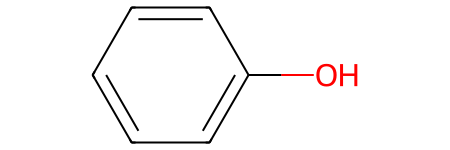

In [3]:
Chem.MolFromSmiles('[OH]c1ccccc1')

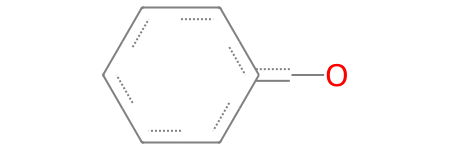

In [4]:
Chem.MolFromSmarts('[OH]c1ccccc1')

#### Atomic Primitives

SMARTS provides symbols describing atomic properties beyond SMILES (additional or more general options for atoms, charge, and isotops) as described in table below. Here, `<n>` stands for a digit, `<c>` for chiral class. `[H]` means hydrogen atom. `[*H2]` means any atom with exactly two hydrogens attached. 

|Symbol|Symbol name|Atomic property requirements|Default|
|-------|-----------|----------------------------|------|
|*	|wildcard|	any atom|	(no default)|
|a  |aromatic|aromatic|(no deafault)|
|A  |aliphatic|aliphatic|(no default)|
|D`<n>` |degree|`<n>` explicit connections|exactly one|
|H`<n>` |total H-count|`<n>` attached Hs|exactly one|
|h`<n>`|	implicit H-count|	`<n>` implicit Hs|	at least one|
|R<n> |	ring membership|	in `<n>` SSSR rings|	any ring atom|
|r`<n>`|	ring size|	in smallest SSSR ring of size `<n>`|	any ring atom|
|v`<n>`|	valence|	total bond order `<n>`|	exactly one|
|X`<n>` |	connectivity|	`<n>` total connections|	exactly one|
|x`<n>`|	ring connectivity|	`<n>` total ring connections|	at least one|
|-`<n>` |	negative charge|	-`<n>` charge|	-1 charge (-- is -2, etc)|
|+`<n>` |	posoitive charge|	+`<n>` charge|	+1 charge (++ is +2, etc)|
|#n	|atomic number|	atomic number `<n>`|	(no default)|
|@	|chirality	|anticlockwise	|anticlockwise, default class|
|@@	|chirality	|clockwise	|clockwise, default class|
|@`<c><n>` |	chirality |chiral class `<c>` chirality `<n>`|	(no default)|
|@`<c><n>`?|	chiral or unspec|	chirality `<c><n>` or unspecified|	(no default)|
|`<n>` |	atomic mass|	explicit atomic mass|	unspecified mass|

#### Examples

|Symbol|significance|
|-------|------------------|
|C	|aliphatic carbon atom|
|c	|aromatic carbon atom|
|a	|aromatic atom|
|[#6]	|carbon atom|
|[Ca]	|calcium atom|
|[++]	|atom with a +2 charge|	
|[R]	|atom in any ring|
|[D3]	|atom with 3 explicit bonds (implicit H's don't count)|
|[X3]	|atom with 3 total bonds (includes implicit H's)|
|[v3]	|atom with bond orders totaling 3 (includes implicit H's)|
|C[C@H]`(F)`O	|match chirality (H-F-O anticlockwise viewed from C)|
|C[C@?H]`(F)`O	|matches if chirality is as specified or is not specified|

#### Bond Primitives

|Symbol|	Atomic property requirements|
|------|--------------------------------|
|- |	single bond (aliphatic)|
|/ |	directional bond "up"|
|\ |	directional bond "down"|
|/? |	directional bond "up or unspecified"|
|\\? |	directional bond "down or unspecified"|
|= |	double bond|
|# |	triple bond|
|: |	aromatic bond|
|~ |	any bond (wildcard)|
|@ |	any ring bond|

| Symbol|signicance |
|---|-----|
|C |	any aliphatic carbon|
|cc |	any pair of attached aromatic carbons|
|c:c	| aromatic carbons joined by an aromatic bond|
|c-c	| aromatic carbons joined by a single bond (e.g. biphenyl)|

#### SMARTS Logical Operators

|Symbol	|Expression	|Meaning|
|-------|-----------|-------|
|exclamation	|!e1	|not e1|
|ampersand	|e1&e2	|a1 and e2 (high precedence)|
|comma	|e1,e2	|e1 or e2|
|semicolon	|e1;e2	|e1 and e2 (low precedence)|

All atomic expressions which are not simple primitives must be enclosed in brackets. The default operation is & (high precedence "and"). 
The ability to form expressions gives the SMARTS user a great deal of power to specify exactly what is desired. The two forms of the AND operator are used in SMARTS instead of grouping operators.

|Operation | Meaning|
|----------|---------|
| [CH2]	| aliphatic carbon with two hydrogens (methylene carbon) |
| [!C;R]	| NOT aliphatic carbon AND in ring |
| [!C;!R0]	| same as above. "!R0" means not in zero rings |
| [n;H1]	| H-pyrrole nitrogen |
| [n&H1]	| same as above |
| [nH1]	| same as above |
| [c,n&H1]	| any aromatic carbon OR H-pyrrole nitrogen |
| [X3&H0]	| atom with 3 total bonds and no H's |
| [c,n;H1]	| aromatic carbon OR aromatic nitrogen and exactly one H |
| [Cl]	| any chlorine atom |
| [35*]	| any atom of mass 35 |
| [35Cl]	| chlorine atom of mass 35| 
| [F,Cl,Br,I]	| the 1st four halogens |

#### Recursive SMARTS

Any SMARTS expression may be used to define an atomic environment by writing a SMARTS starting with the atom of interest in this form: $(SMARTS).

Such definitions may be considered atomic properties. These expressions can be used in same manner as other atomic primitives (also, they can be nested). Recursive SMARTS expressions are used in the following manner.

| Expression | Meaning |
|---------|---------|
| *C	| atom connected to methyl (or methylene) carbon |
| *CC	| atom connected to ethyl carbon |
| [`$(*C);$(*CC)`]	| atom in both above environments (matches CCC) |

#### expressions for methyl carbons which are ortho / meta / para on an aromatic ring.

| Expression | Meaning |
|---------|---------|
| CaaO	| C ortho to O |
| CaaaN	| C meta to N |
| Caa(O)aN	| C ortho to O and meta to N (but 2O,3N only) |
| Ca(aO)aaN	| C ortho to O and meta to N (but 2O,5N only) |
| C[`$(aaO);$(aaaN)`]	| C ortho to O and meta to N (all cases) |

#### Component-level grouping of SMARTS

SMARTS may contain "zero-level" parentheses which can be used to group dot-disconnected fragments. This grouping operator allows SMARTS to express more powerful component queries. In general, a single set of parentheses may surround any legal SMARTS expression. Two or more of these expressions may be combined into more complex SMARTS: (SMARTS)(SMARTS).(SMARTS)(SMARTS).SMARTS

The semantics of the "zero-level" parentheses are that all of the atom and bond expressions within a set of zero-level parentheses must match within a single component of the target.

| SMARTS |	SMILES |	Match behavior |
|--------|---------|-------------------|
| C.C |	CCCC |	yes, no component level grouping specified |
| (C.C)	| CCCC	| yes, both carbons in the query match the same component |
| (C).(C) |	CCCC |	no, the query must match carbons in two different components |
| (C).(C) |	CCCC.CCCC |	yes, the query does match carbons in two different components |
| (C).C |	CCCC	| yes, both carbons in the query match the same component |
| (C).(C).C	| CCCC.CCCC	| yes, the first two carbons match different components, the third matches a carbon anywhere |

These component-level grouping operators were added specifically for reaction processing. Without this construct, it is impossible to distinguish inter- versus intramolecular reaction queries. See an example below. 

| Reaction SMARTS expression |	Match behavior |
|----------------------------|-----------------|
| C(=O)O.OCC>>C(=O)OCC.O	| Matches esterifications |
| (C(=O)O).(OCC)>>C(=O)OCC.O	| Matches intermolecular esterifications |
| (C(=O)O.OCC)>>C(=O)OCC.O	| Matches intramolecular esterifications (lactonizations) |

#### Reaction Queries

Reaction queries are expressed using the SMARTS language. SMARTS has been extended to handle reaction query features in much the same fashion as SMILES has been extended to handle reactions.

A reaction query may be composed of optional reactant, agent, and product parts, which are separated by the ">" character. In this case, the parts of the reaction query match against the corresponding roles within the reaction target, as expected. Note that it is also quite reasonable to search a set of reactions by giving a molecule query. In this case, the answer is a hit if the molecule SMARTS matches anywhere within the reaction target. In effect, matching a molecule SMARTS against a reaction target is a query where the role of the SMARTS is unspecified.

#### Example Reaction SMARTS
| Query	| Target	| Matches |
|-------|-----------|---------|
| C>>	| CC>>CN	| 2 |
| >C>	| CC>>CN	| 0 |
| >>C	| CC>>CN	| 1 |
| C	| CC>>CN	| 3 |

The atom mapping for a reaction query is optional. When included in the definition of the pattern, it is used for searching.

If atom maps are used for a SMARTS match, their only effect is to potentially eliminate answers from the result. Atom maps can never, under any circumstance cause the addition of hits to an answer set. Conceptually, one can consider the atom map matching as a post-processing step after a "normal" match. Each of the hits is examined to make sure the atom map classes match on the reactant and product sides of the reaction.

In SMARTS, the atom map has unusual semantics. An atom map is a property which must be evaluated on a global scope during the match. One can not know if the map is correct without considering every atom in the match, in effect requiring the enumeration of every possible path before testing. This is much more computationally expensive than the current SMARTS implementation, which tests the paths as they are built and stops as soon as a path fails to match.

In order to avoid this computational trap, the expressiveness of SMARTS for atom maps has been limited to a low-precedence and operation. That is, only expressions of form: "[expr:n]" or "[expr:?n]" are allowed, where "expr" is any legal atomic expression excluding atom maps and "n" is a map class value. This expression is a low-precedence logical AND between "expr" and the map expression ":n". The following examples illustrate other nuances of the semantics:

#### Example Reaction SMARTS

| Query	| Target	| Matches |	Comment |
|-------|-----------|---------|---------|
| C>>C | CC>>CC	| 4	| No maps, normal match |
| C>>C |	[CH3:7][CH3:8]>> [CH3:7][CH3:8]	| 4	| No maps in query, maps in target are ignored |
| [C:1]>>C	| [CH3:7][CH3:8]>> [CH3:7][CH3:8] |	4	| Unpaired map in query ignored |
| [C:1]>>[C:1]	| CC>>CC	| 0	| No maps in target, hence no matches |
| [C:?1]>>[C:?1] |	CC>>CC	| 4	| Query says mapped as shown or not present |
| [C:1]>>[C:1]	| [CH3:7][CH3:8]>>[CH3:7][CH3:8] |	2	| Matches for target 7,7 and 8,8 atom pairs |
| [C:1]>>[C:2]	| [CH3:7][CH3:8]>> [CH3:7][CH3:8]	| 4	| When a query class is not found on both sides of the query, it is ignored; this query does NOT say that the atoms are in different classes |
| [C:1][C:1]>>[C:1]	| [CH3:7][CH3:7]>> [CH3:7][CH3:7]	| 4	| Atom maps match with "or" logic. All atoms get bound to class 7 |
| [C:1][C:1]>>[C:1]	| [CH3:7][CH3:8]>> [CH3:7][CH3:8]	| 4	| The reactant atoms are bound to classes 7 and 8. Note that having the first query atom bound to class 7 does not preclude binding the second atom. Next, the product atom can bind to classes 7 or 8 |
| [C:1][C:1]>>[C:1]	| [CH3:7][CH3:7]>> [CH3:7][CH3:8]	| 2	| The reactants are bound to class 7. The product atom can bind to class 7 only |

The last example is the most confusing. Since there is no "or" logic for atom maps, the behavior when checking the maps is as follows: the query reactants can be bound to any classes in the target. These bindings form the set of allowed product bindings. The product query atoms are then tested against this list. If all of the product atoms pass, then the path is a match. The effect of this procedure is to provide the "logical-OR" semantics for atom maps within the simple implementation. The downside of this implementation is that it can be confusing to the user. Fortunately, the simple pairwise atom maps will suffice for most users.

Finally, atom map labels in molecule SMARTS and unpaired atom map labels in reaction SMARTS are ignored. Stated another way, since the atom maps express the idea of a global association of atoms across a reaction, atom maps on a molecule query have no meaning. Similarly, a lone atom map on a reaction atom which doesn't correspond to any other atoms in the query has no meaning. In both of these cases, the query is identical to the query written without the meaningless atom maps.

In recursive SMARTS, reaction expressions are not allowed. The reasons for this are twofold: first, it isn't clear that the meaning of a recursive SMARTS for a reaction would have any useful expressiveness and second, there is a practical problem with the lexical definitions of reactions: given the strict left-to-right definition of reactant-agent-product, how would one express a product atom in a vector binding? Of course we can change the syntax for recursive SMARTS or reactions to accommodate this if it becomes clear that it is useful.

#### SMARTS Versus SMILES

All SMILES expressions are also valid SMARTS expressions, but the semantics changes because SMILES describes molecules whereas SMARTS describes patterns. The molecule represented by a SMILES string is usually, but not always, matched by the same string when used as a SMARTS.

SMILES is interpreted as a molecule, and it is the resultant molecule (not the SMILES string) which is subject to searching. Similarly, SMARTS is interpreted as a pattern; it is this pattern (not the SMARTS string) which is matched against molecules. For instance, the SMILES "C1=CC=CC=C1" (cyclohexatriene) is interpreted as the benzene molecule. This molecule will be matched by the SMARTS c1ccccc1, which is interpreted as the pattern "6 aromatic carbons in a ring". The SMARTS "C1=CC=CC=C1" makes a pattern ("six aliphatic carbons in a ring with alternating single and double bonds") which will not match benzene. It will, however, match the nonaromatic phenylate cation with SMILES C1=CC=CC=[CH+]1.

When atoms are specified without brackets in SMILES, default values are used; in SMARTS, unspecified properties are not defined to be part of the pattern. For instance, the SMILES O means an aliphatic oxygen with zero charge and two hydrogens, i.e. water. In SMARTS, the same expression means any aliphatic oxygen regardless of charge, hydrogen count, etc, e.g. it will match the oxygen in water, but also those in ethanol, acetone, molecular oxygen, hydroxy and hydronium ions, etc. Specifying [OH2] limits the pattern to match only water (this is also the fully specified SMILES for water).

There are a few anachronisms in most SMILES interpreters which can also lead to confusion. Some SMILES interpreters allow implicit hydrogens to be added as explicit atoms on input as a shortcut. E.g., the SMILES for 1H-pyrrole is "[nH]1cccc1" which is matched by itself as SMARTS and by "n1cccc1". The current Daylight SMILES interpreter will also accept "Hn1cccc1" for (not very good) reasons of historical compatibility; this generates the same (hydrogen-suppressed) molecule as does "[nH]1cccc1" and is matched by the same SMARTS. However, the SMARTS "Hn1cccc1" does not match this molecule.

Most SMARTS expressions are not valid SMILES expressions. For instance, the string "cOc" is a valid SMARTS, matching an aliphatic oxygen connected to two aromatic carbons as part of a larger molecule (e.g. diphenyl ether). However, "cOc" does not describe a molecule per se, and is therefore not a valid SMILES.

| SMARTS symbols | meaning |
|----------------|---------|
| cc	| any pair of attached aromatic carbons |
| c:c	| aromatic carbons joined by an aromatic bond |
| c-c	| aromatic carbons joined by a single bond (e.g. biphenyl) |
| O	| any aliphatic oxygen |
| [O;H1]	| simple hydroxy oxygen |
| [O;D1]	| 1-connected (hydroxy or hydroxide) oxygen |
| [O;D2]	| 2-connected (etheric) oxygen |
| [C,c]	| any carbon |
| [F,Cl,Br,I]	| the 1st four halogens |
| [N;R]	| must be aliphatic nitrogen AND in a ring |
| [!C;R] | NOTaliphatic carbon AND in a ring |
| [n;H1]	| H-pyrrole nitrogen |
| [n&H1]	| same as above |
| [c,n&H1]	| any arom carbon OR H-pyrrole nitrogen |
| [c,n;H1]	|arom carbon OR arom nitrogen and exactly one H |
| *!@*	| two atoms connected by a non-ringbond |
| *@;!:*	| two atoms connected by a non-aromatic ringbond |
| [C,c]=,#[C,c]	| two carbons connected by a double or triple bond |

### Examples
All examples taken from Daylight Chemical Information Systems, Inc.

#### C

alkane

Alkyl Carbon
[CX4]

alkene (-ene)

Allenic Carbon
[$([CX2](=C)=C)]

Vinylic Carbon
[$([CX3]=[CX3])]

Ethenyl carbon

alkyne (-yne)

Acetylenic Carbon
[$([CX2]#C)]

arene (Ar , aryl-, aromatic hydrocarbons)

Arene
c

#### C & O

carbonyl

Carbonyl group. Low specificity
[CX3]=[OX1]
Hits carboxylic acid, ester, ketone, aldehyde, carbonic acid/ester,anhydride, carbamic acid/ester, acyl halide, amide.

Carbonyl group
[$([CX3]=[OX1]),$([CX3+]-[OX1-])]
Hits either resonance structure

Carbonyl with Carbon
[CX3](=[OX1])C
Hits aldehyde, ketone, carboxylic acid (except formic), anhydride (except formic), acyl halides (acid halides). Won't hit carbamic acid/ester, 

carbonic acid/ester.
Carbonyl with Nitrogen.
[OX1]=CN

Hits amide, carbamic acid/ester, poly peptide
Carbonyl with Oxygen.
[CX3](=[OX1])O
Hits ester, carboxylic acid, carbonic acid or ester, carbamic acid or ester, anhydride Won't hit aldehyde or ketone.

Acyl Halide
[CX3](=[OX1])[F,Cl,Br,I]

acid halide, -oyl halide
Aldehyde
[CX3H1](=O)[#6]
-al

Anhydride
[CX3](=[OX1])[OX2][CX3](=[OX1])

Amide
[NX3][CX3](=[OX1])[#6]
-amide

Amidinium
[NX3][CX3]=[NX3+]

Carbamate.
[NX3,NX4+][CX3](=[OX1])[OX2,OX1-]
Hits carbamic esters, acids, and zwitterions

Carbamic ester
[NX3][CX3](=[OX1])[OX2H0]

Carbamic acid.
[NX3,NX4+][CX3](=[OX1])[OX2H,OX1-]
Hits carbamic acids and zwitterions.

Carboxylate Ion.
[CX3](=O)[O-]
Hits conjugate bases of carboxylic, carbamic, and carbonic acids.

Carbonic Acid or Carbonic Ester
[CX3](=[OX1])(O)O

Carbonic Acid, Carbonic Ester, or combination
Carbonic Acid or Carbonic Acid-Ester
[CX3](=[OX1])([OX2])[OX2H,OX1H0-1]
Hits acid and conjugate base. Won't hit carbonic acid diester

Carbonic Ester (carbonic acid diester)
C[OX2][CX3](=[OX1])[OX2]C
Won't hit carbonic acid or combination carbonic acid/ester

Carboxylic acid
[CX3](=O)[OX2H1]
-oic acid, COOH

Carboxylic acid or conjugate base.
[CX3](=O)[OX1H0-,OX2H1]

Cyanamide
[NX3][CX2]#[NX1]

Ester Also hits anhydrides
[#6][CX3](=O)[OX2H0][#6]
won't hit formic anhydride.

Ketone
[#6][CX3](=O)[#6]
-one

ether

Ether
[OD2]([#6])[#6]


### H

hydrogen atoms

Hydrogen Atom
[H]
Hits SMILES that are hydrogen atoms: [H+] [2H] [H][H]

Not a Hydrogen Atom
[!#1]
Hits SMILES that are not hydrogen atoms.

Proton
[H+]
Hits positively charged hydrogen atoms: [H+]

hydrogen count

Mono-Hydrogenated Cation
[+H]
Hits atoms that have a positive charge and exactly one attached hydrogen: F[C+](F)[H]

Not Mono-Hydrogenated
[!H] or [!H1]
Hits atoms that don't have exactly one attached hydrogen.


#### N

amide see carbonyl

mine (-amino)

Primary or secondary amine, not amide.
[NX3;H2,H1;!$(NC=O)]
Not ammonium ion (N must be 3-connected), not ammonia (H count can't be 3). Primary or secondary is specified by N's H-count (H2 & H1 respectively). Also note that "&" (and) is the dafault opperator and is higher precedence that "," (or), which is higher precedence than ";" (and). Will hit cyanamides and thioamides

Enamine
[NX3][CX3]=[CX3]

Primary amine, not amide.

[`NX3;H2;!$(NC=[!#6]);!$(NC#[!#6])`][#6] Not amide (C not double bonded to a hetero-atom), not ammonium ion (N must be 3-connected), not ammonia (N's H-count can't be 3), not cyanamide (C not triple bonded to a hetero-atom)

Two primary or secondary amines
[NX3;H2,H1;!$(NC=O)].[NX3;H2,H1;!$(NC=O)]
Here we use the disconnection symbol (".") to match two separate unbonded identical patterns.

Enamine or Aniline Nitrogen
[NX3][$(C=C),$(cc)]

##### amino acids

Generic amino acid: low specificity.
[NX3,NX4+][CX4H]([*])[CX3](=[OX1])[O,N]
For use w/ non-standard a.a. search. hits pro but not gly. Hits acids and conjugate bases. Hits single a.a.s and specific residues w/in 
polypeptides (internal, or terminal).

Dipeptide group. generic amino acid: low specificity.
[NX3H2,NH3X4+][CX4H]([*])[CX3](=[OX1])[NX3,NX4+][CX4H]([*])[CX3](=[OX1])[OX2H,OX1-]
Won't hit pro or gly. Hits acids and conjugate bases.

Amino Acid
[$([NX3H2,NX4H3+]),$([NX3H](C)(C))][CX4H]([*])[CX3](=[OX1])[OX2H,OX1-,N]
Replace * w/ a specific a.a. side chain from the 18_standard_side_chains list to hit a specific standard a.a. Won't work with Proline or Glycine, they have their own SMARTS (see side chain list). Hits acids and conjugate bases. Hits single a.a.s and specific residues w/i n polypeptides (internal, or terminal). {e.g. usage: Alanine side chain is [CH3X4] . Search is [$([NX3H2,NX4H3+]),$([NX3H](C)(C))][CX4H]([ CH3X4])[CX3](=[OX1])[OX2H,OX1-,N]}

amino acid side chains

Alanine side chain
[CH3X4]

Arginine side chain.
[CH2X4][CH2X4][CH2X4][NHX3][CH0X3](=[NH2X3+,NHX2+0])[NH2X3]
Hits acid and conjugate base.

Aspargine side chain.
[CH2X4][CX3](=[OX1])[NX3H2]
Also hits Gln side chain when used alone.

Aspartate (or Aspartic acid) side chain.
[CH2X4][CX3](=[OX1])[OH0-,OH]
Hits acid and conjugate base. Also hits Glu side chain when used alone.

Cysteine side chain.
[CH2X4][SX2H,SX1H0-]
Hits acid and conjugate base

Glutamate (or Glutamic acid) side chain.
[CH2X4][CH2X4][CX3](=[OX1])[OH0-,OH]
Hits acid and conjugate base.

Glycine
[$([$([NX3H2,NX4H3+]),$([NX3H](C)(C))][CX4H2][CX3](=[OX1])[OX2H,OX1-,N])]

Histidine side chain.
`[CH2X4][#6X3]1:[$([#7X3H+,#7X2H0+0]:[#6X3H]:[#7X3H]),$([#7X3H])]:[#6X3H]:
[$([#7X3H+,#7X2H0+0]:[#6X3H]:[#7X3H]),$([#7X3H])]:[#6X3H]1`
Hits acid & conjugate base for either Nitrogen. Note that the Ns can be either ([(Cationic 3-connected with one H) or (Neutral 2-connected without any Hs)] where there is a second-neighbor who is [3-connected with one H]) or (3-connected with one H).

Isoleucine side chain
[CHX4]([CH3X4])[CH2X4][CH3X4]

Leucine side chain
[CH2X4][CHX4]([CH3X4])[CH3X4]

Lysine side chain.
[CH2X4][CH2X4][CH2X4][CH2X4][NX4+,NX3+0]

Acid and conjugate base

Methionine side chain
[CH2X4][CH2X4][SX2][CH3X4]

Phenylalanine side chain
[CH2X4][cX3]1[cX3H][cX3H][cX3H][cX3H][cX3H]1

Proline
[$([NX3H,NX4H2+]),$([NX3](C)(C)(C))]1[CX4H]([CH2][CH2][CH2]1)[CX3](=[OX1])[OX2H,OX1-,N]

Serine side chain
[CH2X4][OX2H]

Thioamide
[NX3][CX3]=[SX1]

Threonine side chain
[CHX4]([CH3X4])[OX2H]

Tryptophan side chain
[CH2X4][cX3]1[cX3H][nX3H][cX3]2[cX3H][cX3H][cX3H][cX3H][cX3]12

Tyrosine side chain.
[CH2X4][cX3]1[cX3H][cX3H][cX3]([OHX2,OH0X1-])[cX3H][cX3H]1

Acid and conjugate base

Valine side chain
[CHX4]([CH3X4])[CH3X4]

Alanine side chain
[CH3X4]

Arginine side chain.
[CH2X4][CH2X4][CH2X4][NHX3][CH0X3](=[NH2X3+,NHX2+0])[NH2X3]
Hits acid and conjugate base.

Aspargine side chain.
[CH2X4][CX3](=[OX1])[NX3H2]
Also hits Gln side chain when used alone.

Aspartate (or Aspartic acid) side chain.
[CH2X4][CX3](=[OX1])[OH0-,OH]
Hits acid and conjugate base. Also hits Glu side chain when used alone.

Cysteine side chain.
[CH2X4][SX2H,SX1H0-]
Hits acid and conjugate base

Glutamate (or Glutamic acid) side chain.
[CH2X4][CH2X4][CX3](=[OX1])[OH0-,OH]
Hits acid and conjugate base.

Glycine
N[CX4H2][CX3](=[OX1])[O,N]
Histidine side chain.
`[CH2X4][#6X3]1:[$([#7X3H+,#7X2H0+0]:[#6X3H]:[#7X3H]),$([#7X3H])]:[#6X3H]`:
`[$([#7X3H+,#7X2H0+0]:[#6X3H]:[#7X3H]),$([#7X3H])]:[#6X3H]1`

Hits acid & conjugate base for either Nitrogen. Note that the Ns can be either ([(Cationic 3-connected with one H) or (Neutral 2-connected without any Hs)] where there is a second-neighbor who is [3-connected

Isoleucine side chain
[CHX4]([CH3X4])[CH2X4][CH3X4]

Leucine side chain
[CH2X4][CHX4]([CH3X4])[CH3X4]

Lysine side chain.
[CH2X4][CH2X4][CH2X4][CH2X4][NX4+,NX3+0]
Acid and conjugate base

Methionine side chain
[CH2X4][CH2X4][SX2][CH3X4]

Phenylalanine side chain
[CH2X4][cX3]1[cX3H][cX3H][cX3H][cX3H][cX3H]1

Proline
N1[CX4H]([CH2][CH2][CH2]1)[CX3](=[OX1])[O,N]

Serine side chain
[CH2X4][OX2H]

Threonine side chain
[CHX4]([CH3X4])[OX2H]

Tryptophan side chain
[CH2X4][cX3]1[cX3H][nX3H][cX3]2[cX3H][cX3H][cX3H][cX3H][cX3]12

Tyrosine side chain.
[CH2X4][cX3]1[cX3H][cX3H][cX3]([OHX2,OH0X1-])[cX3H][cX3H]1
Acid and conjugate base

Valine side chain
[CHX4]([CH3X4])[CH3X4]

##### azide (-azido)

Azide group.

`[$(*-[NX2-]-[NX2+]#[NX1]),$(*-[NX2]=[NX2+]=[NX1-])]`
Hits any atom with an attached azide.

Azide ion.
[$([NX1-]=[NX2+]=[NX1-]),$([NX1]#[NX2+]-[NX1-2])]
Hits N in azide ion

##### azo

Nitrogen.
[#7]
Nitrogen in N-containing compound. aromatic or aliphatic. Most general interpretation of "azo"

Azo Nitrogen. Low specificity.
[NX2]=N
Hits diazene, azoxy and some diazo structures

Azo Nitrogen.

diazene
[NX2]=[NX2]
(diaza alkene)

Azoxy Nitrogen.
`[$([NX2]=[NX3+]([O-])[#6]),$([NX2]=[NX3+0](=[O])[#6])]`

Diazo Nitrogen
`[$([#6]=[N+]=[N-]),$([#6-]-[N+]#[N])]`

Azole.
`[$([nr5]:[nr5,or5,sr5]),$([nr5]:[cr5]:[nr5,or5,sr5])]`
5 member aromatic heterocycle w/ 2double bonds. contains N & another non C (N,O,S) subclasses are furo-, thio-, pyrro- (replace CH o' furfuran, thiophene, pyrrol w/ N)


hydrazine

Hydrazine H2NNH2
[NX3][NX3]

hydrazone

Hydrazone C=NNH2
[NX3][NX2]=[*]

imine

Substituted imine
`[CX3;$([C]([#6])[#6]),$([CH][#6])]=[NX2][#6]`

Schiff base

Substituted or un-substituted imine
`[$([CX3]([#6])[#6]),$([CX3H][#6])]=[$([NX2][#6]),$([NX2H])]`

Iminium
`[NX3+]=[CX3]`

imide

Unsubstituted dicarboximide
`[CX3](=[OX1])[NX3H][CX3](=[OX1])`

Substituted dicarboximide
`[CX3](=[OX1])[NX3H0]([#6])[CX3](=[OX1])`

Dicarboxdiimide
`[CX3](=[OX1])[NX3H0]([NX3H0]([CX3](=[OX1]))[CX3](=[OX1]))[CX3](=[OX1])`


nitrate

Nitrate group
[$([NX3](=[OX1])(=[OX1])O),$([NX3+]([OX1-])(=[OX1])O)]
Also hits nitrate anion

Nitrate Anion
[$([OX1]=[NX3](=[OX1])[OX1-]),$([OX1]=[NX3+]([OX1-])[OX1-])]

nitrile

Nitrile
[NX1]#[CX2]

Isonitrile
[CX1-]#[NX2+]

nitro

Nitro group.
[$([NX3](=O)=O),$([NX3+](=O)[O-])][!#8] Hits both forms.

Two Nitro groups
[$([NX3](=O)=O),$([NX3+](=O)[O-])][!#8].[$([NX3](=O)=O),$([NX3+](=O)[O-])][!#8]

nitroso

Nitroso-group
[NX2]=[OX1]

n-oxide

N-Oxide

`[$([#7+][OX1-]),$([#7v5]=[OX1]);!$([#7](~[O])~[O]);!$([#7]=[#7])]`
Hits both forms. Won't hit azoxy, nitro, nitroso,or nitrate.


### O

hydroxyl (includes alcohol, phenol)

Hydroxyl
[OX2H]

Hydroxyl in Alcohol
[#6][OX2H]

Hydroxyl in Carboxylic Acid
[OX2H][CX3]=[OX1]

Hydroxyl in H-O-P-
[OX2H]P

Enol
[OX2H][#6X3]=[#6]

Phenol
[OX2H][cX3]:[c]

Enol or Phenol
[OX2H][$(C=C),$(cc)]

Hydroxyl_acidic
[$([OH]-*=[!#6])]

An acidic hydroxyl is a hydroxyl bonded to an atom which is multiply bonded to a hetero atom, this includes carboxylic, sulphur, phosphorous, halogen and nitrogen oxyacids.

### P

phosphoric compounds

Phosphoric_acid groups.
[$(P(=[OX1])([$([OX2H]),$([OX1-]),$([OX2]P)])([$([OX2H]),$([OX1-]),$([OX2]P)])[$([OX2H]),$([OX1-]),$([OX2]P)]),$([P+]([OX1-])([$([OX2H]),$([OX1-]),$([OX2]P)])([$([OX2H]),$([OX1-]),$([OX2]P)])[$([OX2H]),$([OX1-]),$([OX2]P)])]

Hits both depiction forms. Hits orthophosphoric acid and polyphosphoric acid anhydrides. Doesn't hit monophosphoric acid anhydride esters (including acidic mono- & di- esters) but will hit some polyphosphoric acid anhydride esters (mono- esters on pyrophosphoric acid and longer, di- esters on linear triphosphoric acid and longer).
Phosphoric_ester groups.

`[$(P(=[OX1])([OX2][#6])([$([OX2H]),$([OX1-]),$([OX2][#6])])[$([OX2H]),$([OX1-]),$([OX2][#6]),$([OX2]P)]),$([P+]([OX1-])([OX2][#6])([$([OX2H]),$([OX1-]),$([OX2][#6])])[$([OX2H]),$([OX1-]),$([OX2][#6]),$([OX2]P)])]` 

Hits both depiction forms. Doesn't hit non-ester phosphoric_acid groups.

### S

thio groups ( thio-, thi-, sulpho-, mercapto- )

Carbo-Thiocarboxylate
[S-][CX3](=S)[#6]

Carbo-Thioester
S([#6])[CX3](=O)[#6]

Thio analog of carbonyl
[#6X3](=[SX1])([!N])[!N]
Where S replaces O. Not a thioamide.

Thiol, Sulfide or Disulfide Sulfur
[SX2]

Thiol
[#16X2H]

Sulfur with at-least one hydrogen.
[#16!H0]

Thioamide
[NX3][CX3]=[SX1]


sulfide

Sulfide
[#16X2H0]
-alkylthio Won't hit thiols. Hits disulfides.

Mono-sulfide
[#16X2H0][!#16]
alkylthio- or alkoxy- Won't hit thiols. Won't hit disulfides.

Di-sulfide
[#16X2H0][#16X2H0]
Won't hit thiols. Won't hit mono-sulfides.

Two Sulfides
[#16X2H0][!#16].[#16X2H0][!#16]
Won't hit thiols. Won't hit mono-sulfides. Won't hit disulfides.

sulfinate

Sulfinate
`[$([#16X3](=[OX1])[OX2H0]),$([#16X3+]([OX1-])[OX2H0])]`
Won't hit Sulfinic Acid. Hits Both Depiction Forms.

Sulfinic Acid
`[$([#16X3](=[OX1])[OX2H,OX1H0-]),$([#16X3+]([OX1-])[OX2H,OX1H0-])]`
Won't hit substituted Sulfinates. Hits Both Depiction Forms. Hits acid and conjugate base (sulfinate).

### X

halide (-halo -fluoro -chloro -bromo -iodo)

Any carbon attached to any halogen
[#6][F,Cl,Br,I]

Halogen
[F,Cl,Br,I]

Three_halides groups
[F,Cl,Br,I].[F,Cl,Br,I].[F,Cl,Br,I]
Hits SMILES that have three halides.

acyl halide

Acyl Halide
[CX3](=[OX1])[F,Cl,Br,I]
(acid halide, -oyl halide)

## Gross Structual Features

### Chirality

Specified chiral carbon.
`[$([#6X4@](*)(*)(*)*),$([#6X4@H](*)(*)*)]`
Matches carbons whose chirality is specified (clockwise or anticlockwise) Will not match molecules whose chirality is unspecified b ut that could otherwise be considered chiral. Also,therefore won't match molecules that would be chiral due to an implicit connection (i.e.i mplicit H).

"No-conflict" chiral match
C[C@?](F)(Cl)Br
Will match molecules with chiralities as specified or unspecified.

"No-conflict" chiral match where an H is present
C[C@?H](Cl)Br
Will match molecules with chiralities as specified or unspecified.


### Orbital Configuration

sp2 cationic carbon
[$([cX2+](:*):*)]

Aromatic cationic sp2 carbon with a free electron in a non-bonding sp2 hybrid orbital

Aromatic sp2 carbon.
[$([cX3](:*):*),$([cX2+](:*):*)]

The first recursive SMARTS matches carbons that are three-connected, the second case matches two-connected carbons (i.e cations with a free electron in a non-bonding sp2 hybrid orbital)

Any sp2 carbon.
[$([cX3](:*):*),$([cX2+](:*):*),$([CX3]=*),$([CX2+]=*)]

The first recursive SMARTS matches carbons that are three-connected and aromatic. The second case matches two-connected aromatic ca rbons (i.e cations with a free electron in a non-bonding sp2 hybrid orbital). The third case matches three-connected non-aromatic carbons ( alkenes). The fourth case matches non-aromatic cationic alkene carbons.

Any sp2 nitrogen.

`[$([nX3](:*):*),$([nX2](:*):*),$([#7X2]=*),$([NX3](=*)=*),$([#7X3+](-*)=*),$([#7X3+H]=*)]`

Can be aromatic 3-connected with 2 aromatic bonds (eg pyrrole,Pyridine-N-oxide), aromatic 2-connected with 2 aromatic bonds (and a free pair of electrons in a nonbonding orbital, e.g.Pyridine), either aromatic or non-aromatic 2-connected with a double bond (and a free pair of electrons in a nonbonding orbital, e.g. C=N ), non aromatic 3-connected with 2 double bonds (e.g. a nitro group; this form does not exist in reality, SMILES can represent the charge-separated resonance structures as a single uncharged structure), either aromatic or non-aromatic 3-connected cation w/ 1 single bond and 1 double bond (e.g. a nitro group, here the individual charge-separated resonance structures are specified), either aromatic or non-aromatic 3-connected hydrogenated cation with a double bond (as the previous case but R is hydrogen), rspectively.

Explicit Hydrogen on sp2-Nitrogen
`[$([#1X1][$([nX3](:*):*),$([nX2](:*):*),$([#7X2]=*),$([NX3](=*)=*),$([#7X3+](-*)=*),$([#7X3+H]=*)])]`

(H must be an isotope or ion)

sp3 nitrogen
`[$([NX4+]),$([NX3]);!$(*=*)&!$(*:*)]`

One atom that is (a 4-connected N cation or a 3-connected N) and is not double bonded and is not aromatically bonded.

Explicit Hydrogen on an sp3 N.
`[$([#1X1][$([NX4+]),$([NX3]);!$(*=*)&!$(*:*)])]`
One atom that is a 1-connected H that is bonded to an sp3 N. (H must be an isotope or ion)

sp2 N in N-Oxide
[$([$([NX3]=O),$([NX3+][O-])])]

sp3 N in N-Oxide Exclusive

`[$([$([NX4]=O),$([NX4+][O-])])]`
Only hits if O is explicitly present. Won't hit if * is in SMILES in place of O.

sp3 N in N-Oxide Inclusive

[$([$([NX4]=O),$([NX4+][O-,#0])])]
Hits if O could be present. Hits if * if used in place of O in smiles.


### Chains & Branching

Unbranched_alkane groups.
[R0;D2][R0;D2][R0;D2][R0;D2]

Only hits alkanes (single-bond chains). Only hits chains of at-least 4 members. All non-(implicit-hydrogen) atoms count as branches (e.g. halide substituted chains count as branched).

Unbranched_chain groups.
[R0;D2]~[R0;D2]~[R0;D2]~[R0;D2]

Hits any bond (single, double, triple). Only hits chains of at-least 4 members. All non-(implicit-hydrogen) atoms count as branches (e.g. halide substituted chains count as branched).

Long_chain groups.
[AR0]~[AR0]~[AR0]~[AR0]~[AR0]~[AR0]~[AR0]~[AR0]

Aliphatic chains at-least 8 members long.

Atom_fragment
`[!$([#6+0]);!$(C(F)(F)F);!$(c(:[!c]):[!c])!$([#6]=,#[!#6])]`

(CLOGP definition) A fragment atom is a not an isolating carbon

Carbon_isolating
`[$([#6+0]);!$(C(F)(F)F);!$(c(:[!c]):[!c])!$([#6]=,#[!#6])]`

This definition is based on that in CLOGP, so it is a charge-neutral carbon, which is not a CF3 or an aromatic C between two aromati c hetero atoms eg in tetrazole, it is not multiply bonded to a hetero atom.

Terminal S bonded to P
[$([SX1]~P)]

Nitrogen on -N-C=N-
[$([NX3]C=N)]

Nitrogen on -N-N=C-
[$([NX3]N=C)]

Nitrogen on -N-N=N-
[$([NX3]N=N)]

Oxygen in -O-C=N-
[$([OX2]C=N

### Rotation

Rotatable bond
`[!$(*#*)&!D1]-!@[!$(*#*)&!D1]`

An atom which is not triply bonded and not one-connected i.e.terminal connected by a single non-ring bond to and equivalent atom. Note that logical operators can be applied to bonds ("-&!@"). Here, the overall SMARTS consists of two atoms and one bond. The bond is "site and not ring". *#* any atom triple bonded to any atom. By enclosing this SMARTS in parentheses and preceding with $, this enables us to use $(*#*) to write recursive SMARTS using that string as an atom primitive. The purpose is to avoid bonds such as c1ccccc1-C#C which wo be considered rotatable without this specification.


#### Cyclic Features

Bicyclic
[$([*R2]([*R])([*R])([*R]))].[$([*R2]([*R])([*R])([*R]))]

Bicyclic compounds have 2 bridgehead atoms with 3 arms connecting the bridgehead atoms.

Ortho
*-!:aa-!:*

Ortho-substituted ring

Meta
*-!:aaa-!:*
Meta-substituted ring

Para
*-!:aaaa-!:*

Para-substituted ring

Acylic-bonds
*!@*

Single bond and not in a ring
*-!@*

Non-ring atom
[R0] or [!R]

Macrocycle groups.
[r;!r3;!r4;!r5;!r6;!r7]

S in aromatic 5-ring with lone pair
[sX2r5]

Aromatic 5-Ring O with Lone Pair
[oX2r5]

N in 5-sided aromatic ring
[nX2r5]

Spiro-ring center
[X4;R2;r4,r5,r6](@[r4,r5,r6])(@[r4,r5,r6])(@[r4,r5,r6])@[r4,r5,r6]rings size 4-6

N in 5-ring arom
[$([nX2r5]:[a-]),$([nX2r5]:[a]:[a-])] anion

CIS or TRANS double bond in a ring
*/,\[R]=;@[R]/,\*

An isomeric SMARTS consisting of four atoms and three bonds.

CIS or TRANS double or aromatic bond in a ring

*/,\[R]=,:;@[R]/,\*

Unfused benzene ring
[cR1]1[cR1][cR1][cR1][cR1][cR1]1

To find a benzene ring which is not fused, we write a SMARTS of 6 aromatic carbons in a ring where each atom is only in one ring:
Multiple non-fused benzene rings

[cR1]1[cR1][cR1][cR1][cR1][cR1]1.[cR1]1[cR1][cR1][cR1][cR1][cR1]1

Fused benzene rings
c12ccccc1cccc2

## Meta-SMARTS

### Amino Acids


Generic amino acid: low specificity.
`[NX3,NX4+][CX4H]([*])[CX3](=[OX1])[O,N]`

For use w/ non-standard a.a. search. hits pro but not gly. Hits acids and conjugate bases. Hits single a.a.s and specific residues w/in polypeptides (internal, or terminal).

A.A. Template for 20 standard a.a.s
`[$([$([NX3H,NX4H2+]),$([NX3](C)(C)(C))]1[CX4H]([CH2][CH2][CH2]1)[CX3](=[OX1])[OX2H,OX1-,N]),
$([$([NX3H2,NX4H3+]),$([NX3H](C)(C))][CX4H2][CX3](=[OX1])[OX2H,OX1-,N]),$([$([NX3H2,NX4H3+]),$([NX3H](C)(C))][CX4H]([*])[CX3](=[OX1])[OX2H,OX1-,N])]`

Pro, Gly, Other. Replace * w/ the entire 18_standard_side_chains list to get "any standard a.a." Hits acids and conjugate bases. Hits single a.a.s and specific residues w/in polypeptides (internal, or terminal).

Proline
`[$([NX3H,NX4H2+]),$([NX3](C)(C)(C))]1[CX4H]([CH2][CH2][CH2]1)[CX3](=[OX1])[OX2H,OX1-,N]`

Glycine
`[$([$([NX3H2,NX4H3+]),$([NX3H](C)(C))][CX4H2][CX3](=[OX1])[OX2H,OX1-,N])]`

Other a.a.
`[$([NX3H2,NX4H3+]),$([NX3H](C)(C))][CX4H]([*])[CX3](=[OX1])[OX2H,OX1-,N]`

Replace * w/ a specific a.a. side chain from the 18_standard_side_chains list to hit a specific standard a.a. Won't work with Proline or Glycine, they have their own SMARTS (see side chain list). Hits acids and conjugate bases. Hits single a.a.s and specific residues w/i polypeptides (internal, or terminal).
    Example usage:
    Alanine side chain is [CH3X4] 
    Alanine Search is [$([NX3H2,NX4H3+]),$([NX3H](C)(C))][CX4H]([CH3X4])[CX3](=[OX1])[OX2H,OX1-,N]
18_standard_aa_side_chains.

`([$([CH3X4]),$([CH2X4][CH2X4][CH2X4][NHX3][CH0X3](=[NH2X3+,NHX2+0])[NH2X3]),
$([CH2X4][CX3](=[OX1])[NX3H2]),$([CH2X4][CX3](=[OX1])[OH0-,OH]),
$([CH2X4][SX2H,SX1H0-]),$([CH2X4][CH2X4][CX3](=[OX1])[OH0-,OH]),
$([CH2X4][#6X3]1:[$([#7X3H+,#7X2H0+0]:[#6X3H]:[#7X3H]),$([#7X3H])]:
[#6X3H]:[$([#7X3H+,#7X2H0+0]:[#6X3H]:[#7X3H]),$([#7X3H])]:[#6X3H]1),
$([CHX4]([CH3X4])[CH2X4][CH3X4]),$([CH2X4][CHX4]([CH3X4])[CH3X4]),
$([CH2X4][CH2X4][CH2X4][CH2X4][NX4+,NX3+0]),$([CH2X4][CH2X4][SX2][CH3X4]),
$([CH2X4][cX3]1[cX3H][cX3H][cX3H][cX3H][cX3H]1),$([CH2X4][OX2H]),
$([CHX4]([CH3X4])[OX2H]),$([CH2X4][cX3]1[cX3H][nX3H][cX3]2[cX3H][cX3H][cX3H][cX3H][cX3]12),
$([CH2X4][cX3]1[cX3H][cX3H][cX3]([OHX2,OH0X1-])[cX3H][cX3H]1),$([CHX4]([CH3X4])[CH3X4])])`

Can be any of the standard 18 (Pro & Gly are treated separately) Hits acids and conjugate bases.


N in Any_standard_amino_acid.
`[$([$([NX3H,NX4H2+]),$([NX3](C)(C)(C))]1[CX4H]([CH2][CH2][CH2]1)[CX3]
(=[OX1])[OX2H,OX1-,N]),$([$([NX3H2,NX4H3+]),$([NX3H](C)(C))][CX4H2][CX3]
(=[OX1])[OX2H,OX1-,N]),$([$([NX3H2,NX4H3+]),$([NX3H](C)(C))][CX4H]([$([CH3X4]),
$([CH2X4][CH2X4][CH2X4][NHX3][CH0X3](=[NH2X3+,NHX2+0])[NH2X3]),$
([CH2X4][CX3](=[OX1])[NX3H2]),$([CH2X4][CX3](=[OX1])[OH0-,OH]),
$([CH2X4][SX2H,SX1H0-]),$([CH2X4][CH2X4][CX3](=[OX1])[OH0-,OH]),
$([CH2X4][#6X3]1:[$([#7X3H+,#7X2H0+0]:[#6X3H]:[#7X3H]),$([#7X3H])]:
[#6X3H]:[$([#7X3H+,#7X2H0+0]:[#6X3H]:[#7X3H]),$([#7X3H])]:[#6X3H]1),
$([CHX4]([CH3X4])[CH2X4][CH3X4]),$([CH2X4][CHX4]([CH3X4])[CH3X4]),
$([CH2X4][CH2X4][CH2X4][CH2X4][NX4+,NX3+0]),$([CH2X4][CH2X4][SX2][CH3X4]),
$([CH2X4][cX3]1[cX3H][cX3H][cX3H][cX3H][cX3H]1),$([CH2X4][OX2H]),
$([CHX4]([CH3X4])[OX2H]),$([CH2X4][cX3]1[cX3H][nX3H][cX3]2[cX3H][cX3H][cX3H][cX3H][cX3]12),
$([CH2X4][cX3]1[cX3H][cX3H][cX3]([OHX2,OH0X1-])[cX3H][cX3H]1),
$([CHX4]([CH3X4])[CH3X4])])[CX3](=[OX1])[OX2H,OX1-,N])]`

Format is A.A.Template for 20 standard a.a.s. where * is replaced by the entire 18_standard_side_chains list (or'd together). A gen eric amino acid with any of the 18 side chains or, proline or glycine. Hits "standard" amino acids that have terminally appended groups (i.e . "standard" refers to the side chains). (Pro, Gly, or 18 normal a.a.s.) Hits single a.a.s and specific residues w/in polypeptides (intern al, or terminal).


Non-standard amino acid.
`[$([NX3,NX4+][CX4H]([*])[CX3](=[OX1])[O,N]);!$([$([$([NX3H,NX4H2+]),
$([NX3](C)(C)(C))]1[CX4H]([CH2][CH2][CH2]1)[CX3](=[OX1])[OX2H,OX1-,N]),
$([$([NX3H2,NX4H3+]),$([NX3H](C)(C))][CX4H2][CX3](=[OX1])[OX2H,OX1-,N]),
$([$([NX3H2,NX4H3+]),$([NX3H](C)(C))][CX4H]([$([CH3X4]),$([CH2X4][CH2X4][CH2X4][NHX3][CH0X3]
(=[NH2X3+,NHX2+0])[NH2X3]),$([CH2X4][CX3](=[OX1])[NX3H2]),$([CH2X4][CX3](=[OX1])[OH0-,OH]),
$([CH2X4][SX2H,SX1H0-]),$([CH2X4][CH2X4][CX3](=[OX1])[OH0-,OH]),$([CH2X4][#6X3]1:
[$([#7X3H+,#7X2H0+0]:[#6X3H]:[#7X3H]),$([#7X3H])]:
[#6X3H]:[$([#7X3H+,#7X2H0+0]:[#6X3H]:[#7X3H]),
$([#7X3H])]:[#6X3H]1),$([CHX4]([CH3X4])[CH2X4][CH3X4]),$([CH2X4][CHX4]([CH3X4])[CH3X4]),
$([CH2X4][CH2X4][CH2X4][CH2X4][NX4+,NX3+0]),$([CH2X4][CH2X4][SX2][CH3X4]),
$([CH2X4][cX3]1[cX3H][cX3H][cX3H][cX3H][cX3H]1),$([CH2X4][OX2H]),$([CHX4]([CH3X4])[OX2H]),
$([CH2X4][cX3]1[cX3H][nX3H][cX3]2[cX3H][cX3H][cX3H][cX3H][cX3]12),
$([CH2X4][cX3]1[cX3H][cX3H][cX3]([OHX2,OH0X1-])[cX3H][cX3H]1),
$([CHX4]([CH3X4])[CH3X4])])[CX3](=[OX1])[OX2H,OX1-,N])])]`

Generic amino acid but not a "standard" amino acid ("standard" refers to the 20 normal side chains). Won't hit amino acids that are non-standard due solely to the fact that groups are terminally-appended to the polypeptide chain (N or C term). format is [$(generic a.a.); !$(not a standard one)] Hits single a.a.s and specific residues w/in polypeptides (internal, or terminal).


##### Recursive SMARTS: Multiple groups

Two possible groups
[$(SMARTS_expression_A),$(SMARTS_expression_B)]

Hits atoms in either environment or group of interest, A or B.

    Example usages:

    Azide group is : [$(*-[NX2-]-[NX2+]#[NX1]),$(*-[NX2]=[NX2+]=[NX1-])]

    Azide ion is: [$([NX1-]=[NX2+]=[NX1-]),$([NX1]#[NX2+]-[NX1-2])]

    Azide or azide ion is: [$([$(*-[NX2-]-[NX2+]#[NX1]),
    
    $(*-[NX2]=[NX2+]=[NX1-])]),
    
    $([$([NX1-]=[NX2+]=[NX1-]),$( [NX1]#[NX2+]-[NX1-2])])]

Recursive SMARTS
[$([atom_that_gets_hit][other_atom][other_atom])]

Hits first atom within parenthesis     Example usages:

    [$([CX3]=[OX1])] hits Carbonyl Carbon     [$([OX1]=[CX3])] hits Carbonyl Oxygen


##### Muntiple Disconnected Groups

Two disconnected SMARTS fragments
([Cl!$(Cl~c)].[c!$(c~Cl)])

A molecule that contains a chlorine and an aromatic carbon but which are not connected to each other. Uses component-level SMARTS. B oth SMARTS fragments must be in the same SMILES target fragment.

Two disconnected SMARTS fragments
([Cl]).([c])
Hits SMILES that contain a chlorine and an aromatic carbon but which are in different SMILES fragments.

Two not-necessarily connected SMARTS fragments
([Cl].[c])
Uses component-level SMARTS. Both SMARTS fragments must be in the same SMILES target fragment.

Two not-necessarily connected fragments
([SMARTS_expression]).([SMARTS_expression])
Uses component-level SMARTS. SMARTS fragments are each in different SMILES target fragments.

Two primary or secondary amines
[NX3;H2,H1;!$(NC=O)].[NX3;H2,H1;!$(NC=O)]
Here we use the "disconnection" symbol (".") to match two separate not-necessarily bonded identical patterns.


## Tools and Tricks

Any carbon aromatic or non-aromatic
[#6] or [c,C]

SMILES wildcard
[#0]
This SMARTS hits the SMILES *

Factoring
[OX2,OX1-][OX2,OX1-] or [O;X2,X1-][O;X2,X1-]

Factor out common atomic expressions in the recursive SMARTS. May improve human readability.

High-precidence "and"
[N&X4&+,N&X3&+0] or [NX4+,NX3+0]
High-precidence "and" (&) is the default logical operator. "Or" (,) is higher precidence than & and low-precidence "and" (;) is lower precidence than &.

Hydrogens

Any atom w/ at-least 1 H
[*!H0,#1]

In SMILES and SMARTS, Hydrogen is not considered an atom (unless it is specified as an isotope). The hydrogen count is instead consi dered a property of an atom. This SMARTS provides a way to effectively hit Hs themselves.

Hs on Carbons
[#6!H0,#1]

Atoms w/ 1 H
[H,#1]


### Electron and Proton Features

#### Acids & Bases

Acid
[!H0;F,Cl,Br,I,N+,$([OH]-*=[!#6]),+]

Proton donor

Carboxylic acid
[CX3](=O)[OX2H1]
(-oic acid, COOH)

Carboxylic acid or conjugate base.
[CX3](=O)[OX1H0-,OX2H1]

Hydroxyl_acidic
[$([OH]-*=[!#6])]

An acidic hydroxyl is a hydroxyl bonded to an atom which is multiply bonded to a hetero atom, this includes carboxylic, sulphur, pho sphorous, halogen and nitrogen oxyacids

Phosphoric_Acid
[$(P(=[OX1])([$([OX2H]),$([OX1-]),$([OX2]P)])([$([OX2H]),$([OX1-]),$([OX2]P)])[$([OX2H]),$([OX1-]),$([OX2]P)]),$([P+]([OX1-])([$([OX2H]),$([OX1-]),$([OX2]P)])([$([OX2H]),$([OX1-]),$([OX2]P)])[$([OX2H]),$([OX1-]),$([OX2]P)])]

Hits both forms. Hits orthophosphoric acid and polyphosphoric acid anhydrides. Doesn't hit monophosphoric acid anhydride esters (in cluding acidic mono- & di- esters) but will hit some polyphosphoric acid anhydride esters (mono- esters on pyrophosphoric acid and longe r, di- esters on linear triphosphoric acid and longer). Hits acid and conjugate base.

Sulfonic Acid. High specificity.

[$([#16X4](=[OX1])(=[OX1])([#6])[OX2H,OX1H0-]),

$([#16X4+2]([OX1-])([OX1-])([#6])[OX2H,OX1H0-])]

Only hits carbo- sulfonic acids (Won't hit herteroatom-substituted molecules). Hits acid and conjugate base. Hits Both Depiction Fo rms. Hits Arene sulfonic acids.

Acyl Halide
[CX3](=[OX1])[F,Cl,Br,I]
(acid halide, -oyl halide)

#### Charge

Anionic divalent Nitrogen
[NX2-]

Oxenium Oxygen
[OX2H+]=*

Oxonium Oxygen
[OX3H2+]

Carbocation
[#6+]
sp2 cationic carbon.

[$([cX2+](:*):*)]
Aromatic cationic sp2 carbon with a free electron in a non-bonding sp2 hybrid orbital
Azide ion.

[$([NX1-]=[NX2+]=[NX1-]),$([NX1]#[NX2+]-[NX1-2])]

Hits N in azide ion

Zwitterion High Specificity
[+1]~*~*~[-1]
+1 charged atom separated by any 3 bonds from a -1 charged atom.
Zwitterion Low Specificity, Crude

`[$([!-0!-1!-2!-3!-4]~*~[!+0!+1!+2!+3!+4]),$([!-0!-1!-2!-3!-4]~*~*~[!+0!+1!+2!+3!+4]),$([!-0!-1!-2!-3!-4]~*~*~*~[!+0!+1!+2!+3!+4]),$([!-0!-1!-2!-3!-4]~*~*~*~*~[!+0!+1!+2!+3!+4]),$([!-0!-1!-2!-3!-4]~*~*~*~*~*~[!+0!+1!+2!+3!+4]),$([!-0!-1!-2!-3!-4]~*~*~*~*~*~*~[!+0!+1!+2!+3!+4]),$([!-0!-1!-2!-3!-4]~*~*~*~*~*~*~*~[!+0!+1!+2!+3!+4]),$([!-0!-1!-2!-3!-4]~*~*~*~*~*~*~*~*~[!+0!+1!+2!+3!+4]),$([!-0!-1!-2!-3!-4]~*~*~*~*~*~*~*~*~*~[!+0!+1!+2!+3!+4])]`

Variously charged moieties separated by up to ten bonds.

Zwitterion Low Specificity
([!-0!-1!-2!-3!-4].[!+0!+1!+2!+3!+4])
Variously charged moieties that are within the same molecule but not-necessarily connected. Uses component-level grouping.



#### H-bond Donors & Acceptors

Hydrogen-bond acceptor
[#6,#7;R0]=[#8]
Only hits carbonyl and nitroso. Matches a 2-atom pattern consisting of a carbon or nitrogen not in a ring, double bonded to an oxyge n.

Hydrogen-bond acceptor
[!$([#6,F,Cl,Br,I,o,s,nX3,#7v5,#15v5,#16v4,#16v6,*+1,*+2,*+3])]
A H-bond acceptor is a heteroatom with no positive charge, note that negatively charged oxygen or sulphur are included. Excluded are halogens, including F, heteroaromatic oxygen, sulphur and pyrrole N. Higher oxidation levels of N,P,S are excluded. Note P(III) is currentl y included. Zeneca's work would imply that (O=S=O) shoud also be excluded.

Hydrogen-bond donor.
[!$([#6,H0,-,-2,-3])]
A H-bond donor is a non-negatively charged heteroatom with at least one H

Hydrogen-bond donor.
[!H0;#7,#8,#9]
Must have an N-H bond, an O-H bond, or a F-H bond

Possible intramolecular H-bond
[O,N;!H0]-*~*-*=[$([C,N;R0]=O)]
Note that the overall SMARTS consists of five atoms. The fifth atom is defined by a "recursive SMARTS", where "$()" encloses a valid nested SMARTS and acts syntactically like an atom-primitive in the overall SMARTS. Multiple nesting is allowed.


#### Radicals

Carbon Free-Radical
[#6;X3v3+0]
Hits a neutral carbon with three single bonds.

Nitrogen Free-Radical
[#7;X2v4+0]
Hits a neutral nitrogen with two single bonds or with a single and a triple bond.